In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
train_dir = "/content/drive/MyDrive/AI last sem/week5/FruitinAmazon/train"

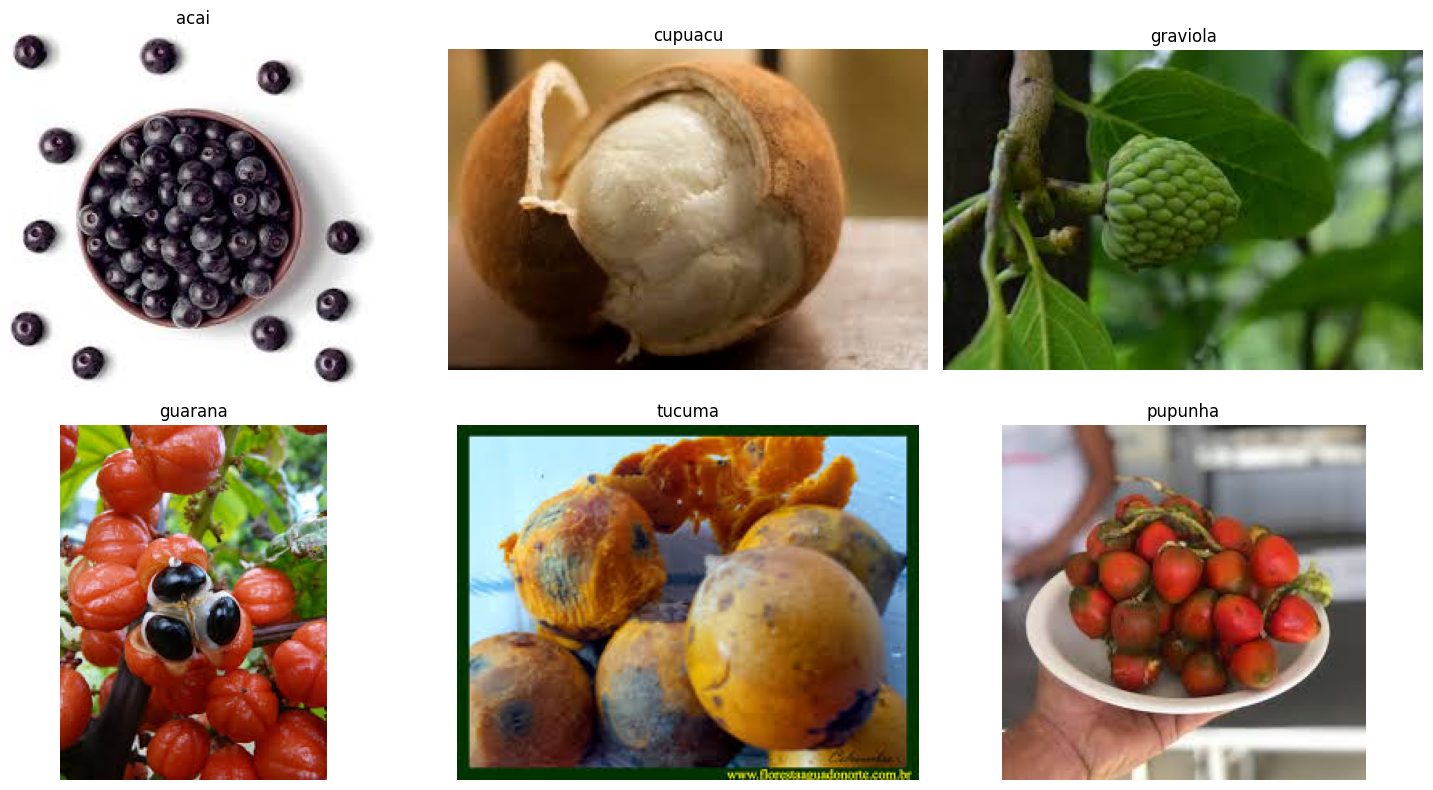

In [ ]:
classes = os.listdir(train_dir)


selected_images = []
selected_labels = []

for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_dir)

    if len(image_files) > 0:
        image_path = os.path.join(class_dir, image_files[0])
        selected_images.append(image_path)
        selected_labels.append(class_name)

num_classes = len(selected_images)
n_cols = (num_classes + 1) // 2
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(15, 8))
axes = axes.flatten()

for i, (img_path, label) in enumerate(zip(selected_images, selected_labels)):
    img = load_img(img_path)
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
corrupted_images = []
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        try:
            img = Image.open(image_path)
            img.verify()
        except (IOError, SyntaxError) as e:
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")


if corrupted_images:
    print("Corrupted images found:")
    for image_path in corrupted_images:
        print(image_path)
else:
    print("No corrupted images found.")

No corrupted images found.


In [ ]:
img_height, img_width = 180, 180
# Batch size
batch_size = 32
# Validation split ratio
validation_split = 0.2

# Create training dataset with split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
)
# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
)

# Display the first batch from training dataset
for image_batch, labels_batch in train_ds.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


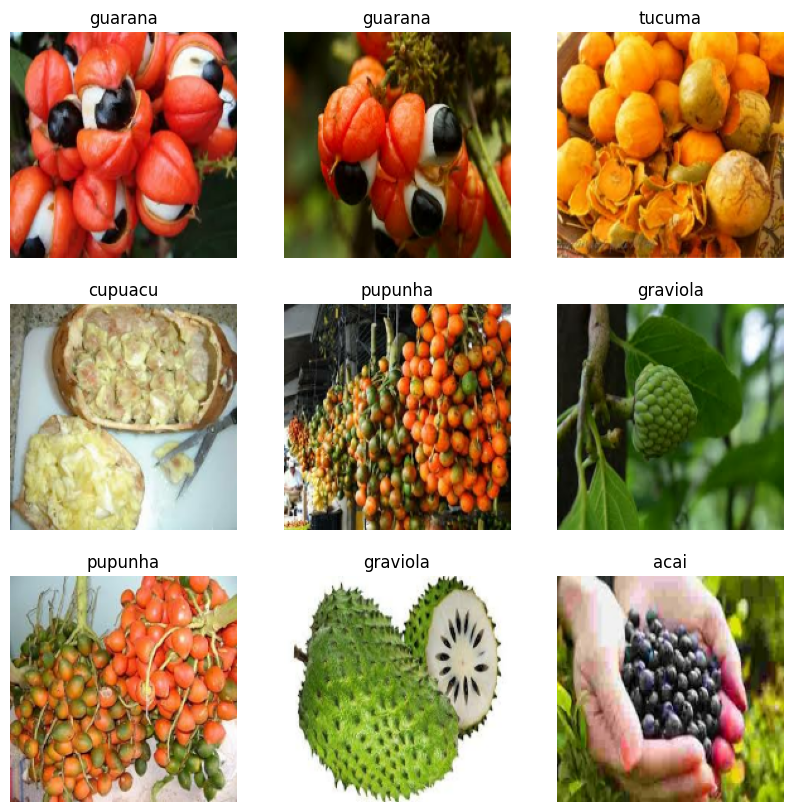

In [ ]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
    plt.show()

In [9]:
def generate_model(input_shape, num_classes):
    model = tf.keras.Sequential([
      layers.Rescaling(1./255, input_shape=input_shape),
      # Convolutional layers
      layers.Conv2D(32, (3, 3),strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),

      # Flatten the output of the convolutional layers
      layers.Flatten(),

      # Dense layers for classification
      layers.Dense(64, activation='relu'),
      layers.Dense(num_classes, activation='softmax')
  ])

    return model

In [10]:
input_shape = (img_height, img_width, 3)
num_classes = len(train_ds.class_names)


In [13]:
model = generate_model(input_shape, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,030 (910.27 KB)

 Trainable params: 233,030 (910.27 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,030 (910.27 KB)

 Trainable params: 233,030 (910.27 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

In [23]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=16,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8976 - loss: 0.3984 - val_accuracy: 0.4444 - val_loss: 1.9652
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8650 - loss: 0.3863 - val_accuracy: 0.4444 - val_loss: 1.6228
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9319 - loss: 0.2901 - val_accuracy: 0.5000 - val_loss: 1.4542
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8728 - loss: 0.4284 - val_accuracy: 0.4444 - val_loss: 1.9374
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8859 - loss: 0.3560 - val_accuracy: 0.3889 - val_loss: 2.1742
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9123 - loss: 0.2401 - val_accuracy: 0.5556 - val_loss: 1.4302
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9379 - loss: 0.2525 - val_accuracy: 0.6111 - val_loss: 1.4458
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9449 - loss: 0.2330 - val_accuracy: 0.4444 - val_loss: 1.8873
Epoch 9/20
3/3 

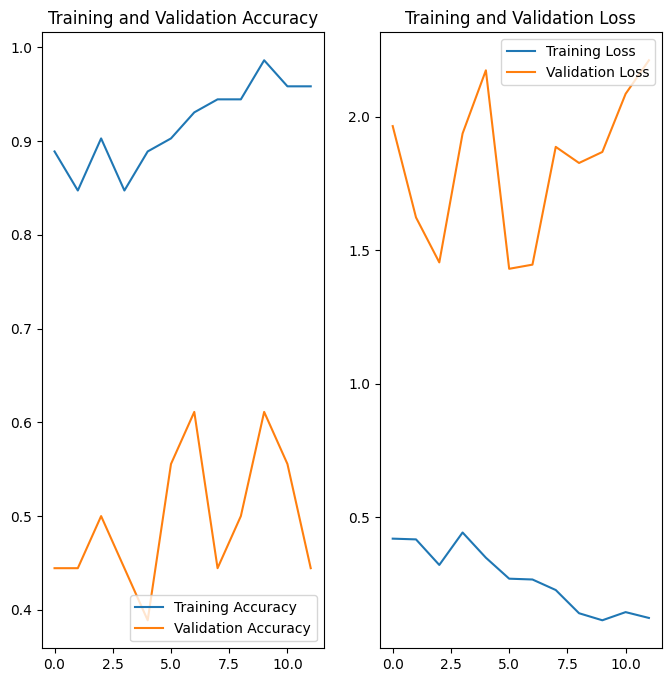

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # Use actual number of epochs run

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7222 - loss: 1.1298
Validation Accuracy: 72.22%
Validation Loss: 1.1298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


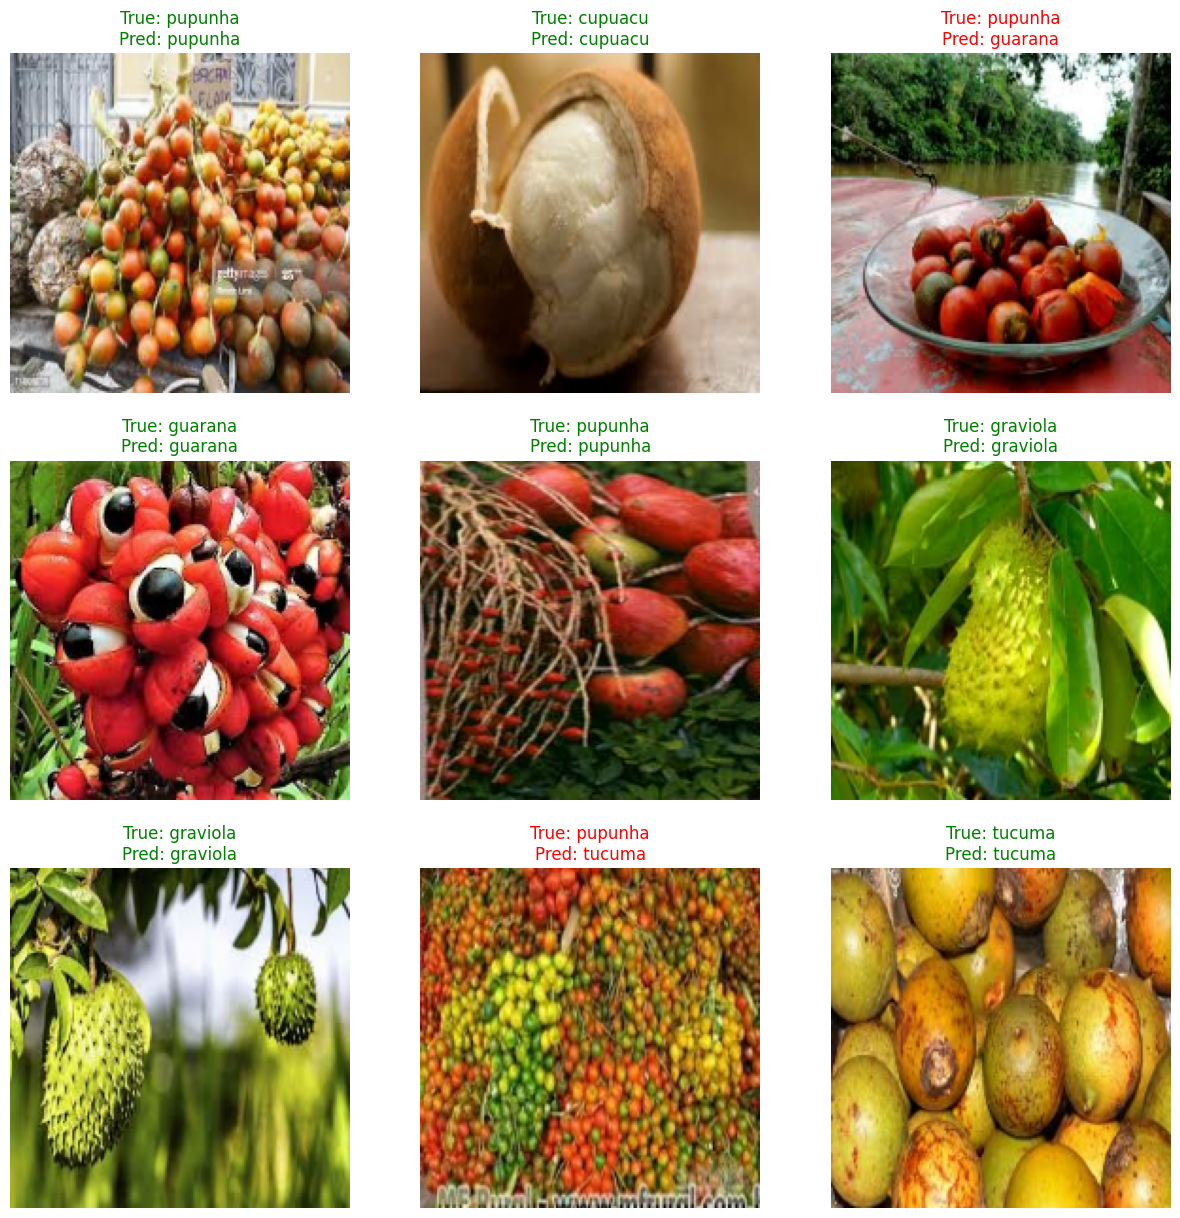

In [25]:
# Loading the best saved model
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

# Evaluate the model on validation data
val_loss, val_acc = best_model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

# Make predictions on validation data
import numpy as np

# Get a batch of validation images
for images, labels in val_ds.take(1):
    # Make predictions
    predictions = best_model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Display some predictions
    plt.figure(figsize=(15, 15))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        true_label = val_ds.class_names[labels[i]]
        pred_label = val_ds.class_names[predicted_labels[i]]

        if true_label == pred_label:
            color = 'green'
        else:
            color = 'red'

        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis("off")
    plt.show()

In [29]:
best_model.save("fruit_classifier.h5")

In [30]:
from sklearn.metrics import classification_report

# Load the saved model
loaded_model = load_model("fruit_classifier.h5")

# Evaluate the loaded model
val_loss, val_acc = loaded_model.evaluate(val_ds)
print(f"Loaded Model Validation Accuracy: {val_acc*100:.2f}%")
print(f"Loaded Model Validation Loss: {val_loss:.4f}")

# Make predictions and generate classification report
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = loaded_model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

print(classification_report(y_true, y_pred, target_names=val_ds.class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step - accuracy: 0.7222 - loss: 1.1298
Loaded Model Validation Accuracy: 72.22%
Loaded Model Validation Loss: 1.1298
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
              precision    recall  f1-score   support

        acai       1.00      1.00      1.00         1
     cupuacu       0.50      0.50      0.50         2
    graviola       1.00      1.00      1.00         3
     guarana       0.83      1.00      0.91         5
     pupunha       0.50      0.50      0.50         4
      tucuma       0.50      0.33      0.40         3

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.70      0.72      0.71        18

